Number of sentences = 2790
Number of subjects = 501


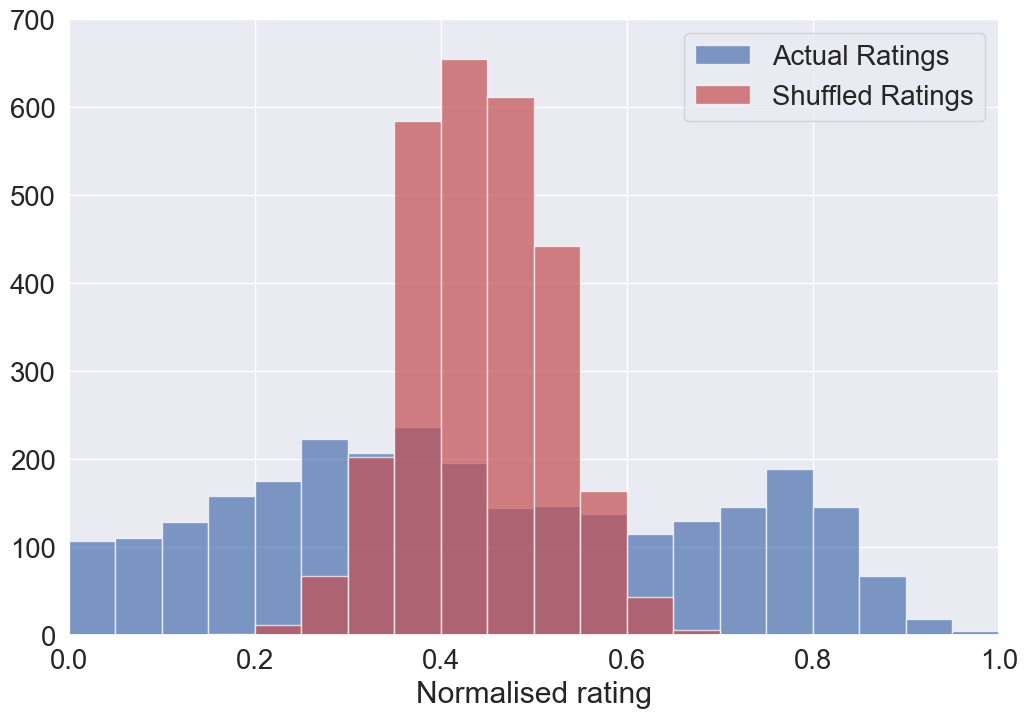

In [20]:
# A simple script for plotting the histogram of actual versus shuffled ratings
# Run on python 3.9
# James Fodor 2023
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.8)


def analyze_similarity_rating(file_address):
    # Load the Excel file
    data_T = pd.read_excel(file_address)
    data_T = data_T.iloc[1:, :]  # Delete the 1st header row

    # Extract the rating data
    data_rating = data_T.iloc[:, 3:].values
    data_rating = data_rating[9:, :]  # Exclude the first 10 pairs for the attention check
    data_rating = data_rating.astype(float)

    # Check the basics
    num_sentences = data_rating.shape[0]
    print(f'Number of sentences = {num_sentences}')
    num_subjects = data_rating.shape[1]
    print(f'Number of subjects = {num_subjects}')
    bin_edges = np.linspace(0, 1, 21)

    # Plot the histogram of the average rating
    data_mean = np.array([np.nanmean(row) for row in data_rating])
    data_mean = (data_mean - 1)/6  # Normalization
    plt.figure(figsize=(12,8), dpi=100)
    plt.hist(data_mean, bins=bin_edges, alpha=0.7, color='b', label='Actual Ratings')

    # Shuffle the rating data within each subject
    data_rating_shuffled = np.zeros_like(data_rating)
    for s in range(num_subjects):
        tmp_data_subject = data_rating[:, s]
        idx_non_nan = ~np.isnan(tmp_data_subject)
        tmp_data_subject_non_nan = tmp_data_subject[idx_non_nan]
        tmp_data_subject_non_nan_shuffled = np.random.permutation(tmp_data_subject_non_nan)
        tmp_data_subject[idx_non_nan] = tmp_data_subject_non_nan_shuffled
        data_rating_shuffled[:, s] = tmp_data_subject

    # Plot the histogram of the average rating in the shuffled data
    data_mean_shuffled = np.array([np.nanmean(row) for row in data_rating_shuffled])
    data_mean_shuffled = (data_mean_shuffled - 1) / 6  # Normalization
    plt.hist(data_mean_shuffled, bins=bin_edges, alpha=0.7, color='r', label='Shuffled Ratings')
    
    # Set parameters for final plot
    plt.xlim([0, 1])
    plt.ylim([0, 700])
    plt.xlabel('Normalised rating')
    plt.legend()
    plt.show()
    
    return data_mean, data_mean_shuffled
    

data_mean, data_mean_shuffled = analyze_similarity_rating('Data-experiment/Fodor_2023_all_participant_data.xlsx')

In [30]:
# Kolmogorov–Smirnov test of equality of two distributions
from scipy.stats import ks_2samp
ks_stats = ks_2samp(data_mean, data_mean_shuffled)
print('max:',np.max(data_mean))
print('min:',np.min(data_mean))
print('mean:',np.mean(data_mean))
print('std:',np.std(data_mean))
print('KS:',ks_stats)

max: 0.975
min: 0.0
mean: 0.4416498266551553
std: 0.24209321656319724
KS: KstestResult(statistic=0.3103942652329749, pvalue=4.298430568245046e-119, statistic_location=0.31884057971014496, statistic_sign=1)
